## Conceptual

### 1. 

For each of parts (a) through (d), indicate whether we would generally expect the performance of a flexible statistical learning method to be better or worse than an inflexible method. Justify your answer.

(a) 
Better. As the level of flexibility increases, the curve fit the observed data more closely and a better fit would be obtained with the large sample size.

(b)
Worse. The flexible statistical learning method would overfit the data with extremely large number of predictors p and small number of observations n.

(c)
Better. If the relationship between the predictors and response is highly non-linear, an inflexible statistical learning method would lead to high training MSE, while a flexible method may fit the data better.

(d)
Worse. A flexible statistical learning method would fit the noise in the error terms and increase variance.

### 2. 

Explain whether each scenario is a classification or regression problem, and indicate whether we are most interested in inference or prediction. Finally, provide n and p.

(a)
Regression problem. We are interested in inference, say, how the CEO salary is affected as profit, number of employees and industry change.
n - 500 firms in the US
p - profit, number of employees, industry

(b)
Classification problem. We are interested in prediction. To predict a new product and will be a success or a failure.
n - 20 similar products previously launched
p - price charged, marketing budget, comp. price, ten other variables

(c)
Regression problem. We are interested in inference, that is to say, we want to know how the % change in the US dollar in relation to the weekly changes in the world stock markets.
n - 52 weeks of 2012 weekly data
p - % change in US market, % change in British market, % change in German market

### 3. 

We now revisit the bias-variance decomposition.

(a)

(b)
all 5 lines >= 0

i. (squared) bias - decreases monotonically because increases in flexibility
yield a closer fit

ii. variance - increases monotonically because increases in flexibility yield
overfit

iii. training error - decreases monotonically because increases in flexibility
yield a closer fit

iv. test error - concave up curve because increase in flexibility yields a closer
fit before it overfits

v. Bayes (irreducible) error - defines the lower limit, the test error is bounded 
below by the irreducible error due to variance in the error (epsilon) in the output 
values (0 <= value). When the training error is lower than the irreducible error,
overfitting has taken place.
The Bayes error rate is defined for classification problems and is determined by 
the ratio of data points which lie at the 'wrong' side of the decision boundary, 
(0 <= value < 1).

### 5. 

What are the advantages and disadvantages of a very flexible (versus a less flexible) approach for regression or classification? Under what circumstances might a more flexible approach be preferred to a less flexible approach? When might a less flexible approach be preferred?

The advantages for a very flexible approach for regression or classification are obtaining a better fit for non-linear models, decreasing bias.

The disadvantages for a very flexible approach for regression or classification are requires estimating a greater number of parameters, follow the noise too closely (overfit), increasing variance.

A more flexible approach would be preferred to a less flexible approach when we are interested in prediction and not the interpretability of the results.

A less flexible approach would be preferred to a more flexible approach when we are interested in inference and the interpretability of the results.

### 6. 

Describe the differences between a parametric and a non-parametric statistical learning approach. What are the advantages of a parametric approach to regression or classification (as opposed to a non-parametric approach)? What are its disadvantages?

A parametric approach reduces the problem of estimating f down to one of estimating a set of parameters because it assumes a form for f.

A non-parametric approach does not assume a functional form for f and so requires a very large number of observations to accurately estimate f.

The advantages of a parametric approach to regression or classification are the simplifying of modeling f to a few parameters and not as many observations are
required compared to a non-parametric approach.

The disadvantages of a parametric approach to regression or classification are a potential to inaccurately estimate f if the form of f assumed is wrong or
to overfit the observations if more flexible models are used.

### 7. 

The table below provides a training data set containing six observations, three predictors, and one qualitative response variable.

(a)

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
obs0 = np.array([0, 0, 0])
obs1 = np.array([0, 3, 0])
obs2 = np.array([2, 0, 0])
obs3 = np.array([0, 1, 3])
obs4 = np.array([0, 1, 2])
obs5 = np.array([-1, 0, 1])
obs6 = np.array([1, 1, 1])

obs = [obs1, obs2, obs3, obs4, obs5, obs6]
dist = {}

for i in range(6):
    dist['obs'+str(i+1)] = np.sqrt(np.sum((obs[i]-obs0)**2))
    print('obs'+str(i+1)+':', dist['obs'+str(i+1)])

obs1: 3.0
obs2: 2.0
obs3: 3.1622776601683795
obs4: 2.23606797749979
obs5: 1.4142135623730951
obs6: 1.7320508075688772


(b), (c)

In [3]:
sorted(dist.items(), key=lambda item:item[1])

[('obs5', 1.4142135623730951),
 ('obs6', 1.7320508075688772),
 ('obs2', 2.0),
 ('obs4', 2.23606797749979),
 ('obs1', 3.0),
 ('obs3', 3.1622776601683795)]

prediction = Green;

prediction = Red;

(d)

Small. A small K would be flexible for a non-linear decision boundary,
whereas a large K would try to fit a more linear boundary because it takes more
points into consideration.

## Applied

### 8. College dataset

(a)

In [4]:
# college = pd.read_csv('http://faculty.marshall.usc.edu/gareth-james/ISL/College.csv')
college = pd.read_csv('../data/college.csv')
college.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


(b)

In [5]:
college.rename(columns={'Unnamed: 0':'College'}, inplace = True)
college.head()

,College,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


(c) i

In [6]:
college.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


(c) ii

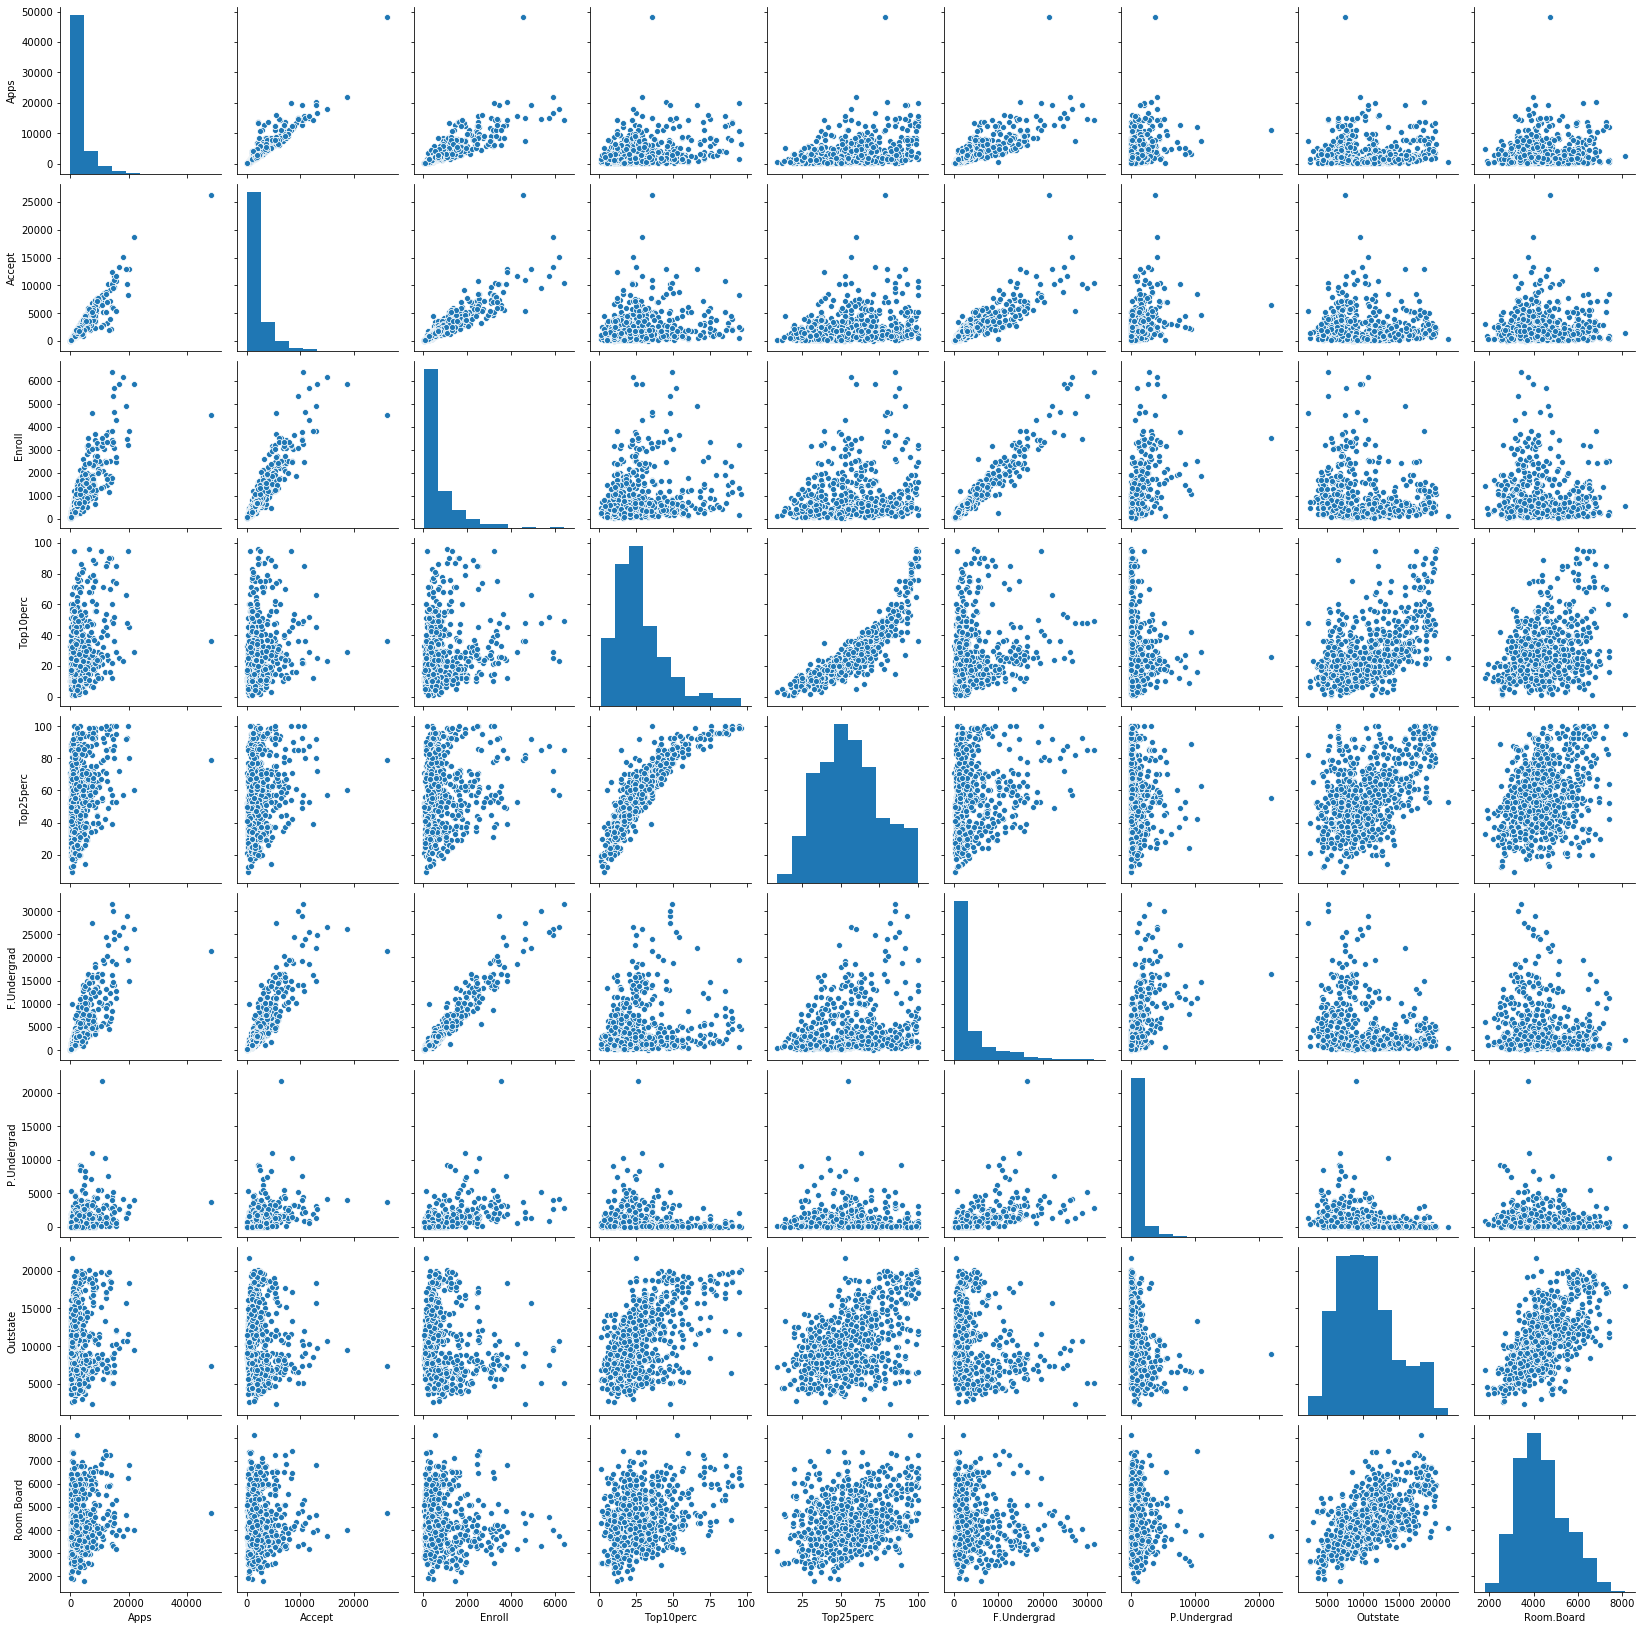

In [7]:
sns.pairplot(college.iloc[:, 1:11])

(c) iii

<AxesSubplot:xlabel='Private', ylabel='Outstate'>

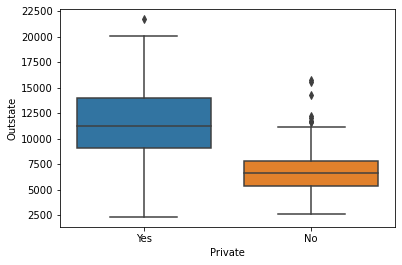

In [28]:
sns.boxplot(data=college, x='Private', y='Outstate')

(c) iv

In [14]:
import janitor as jn

In [29]:
college.add_column('Elite', value=(college.Top10perc > 50));

In [33]:
college.Elite.astype('bool')

0      False
1      False
2      False
3       True
4      False
       ...  
772    False
773    False
774    False
775     True
776    False
Name: Top10perc, Length: 777, dtype: bool

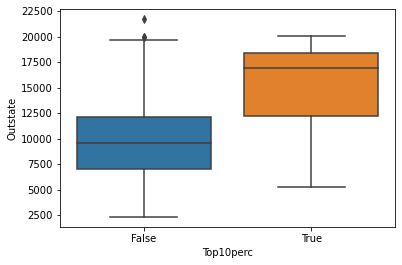

In [37]:
sns.boxplot(college.Elite, college.Outstate);

(c) v

In [45]:
# Normalization
def norm(df):
    return (df-df.mean())/(df.std())

features = 13
college_norm = norm(college.iloc[:, 2:features+1])
college_norm.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD
0,-0.346659,-0.320999,-0.063468,-0.258416,-0.191704,-0.168008,-0.209072,-0.745875,-0.964284,-0.601924,1.269228,-0.162923
1,-0.210748,-0.038678,-0.288398,-0.655234,-1.353040,-0.209653,0.244150,0.457202,1.907979,1.215097,0.235363,-2.673923
2,-0.406604,-0.376076,-0.477814,-0.315105,-0.292690,-0.549212,-0.496770,0.201175,-0.553960,-0.904761,-0.259415,-1.204069
3,-0.667830,-0.681243,-0.691982,1.839046,1.676532,-0.657656,-0.520416,0.626229,0.996150,-0.601924,-0.687730,1.184443
4,-0.725709,-0.764063,-0.780232,-0.655234,-0.595647,-0.711466,0.009000,-0.716047,-0.216584,1.517934,0.235363,0.204540


`pandas.melt()` Unpivot a DataFrame from wide format to long format, optionally leaving identifier variables set.

In [44]:
college_melt = college_norm.pivot_longer(values_to='vals')
college_melt.head()

,variable,vals
0,Apps,-0.346659
1,Apps,-0.210748
2,Apps,-0.406604
3,Apps,-0.667830
4,Apps,-0.725709


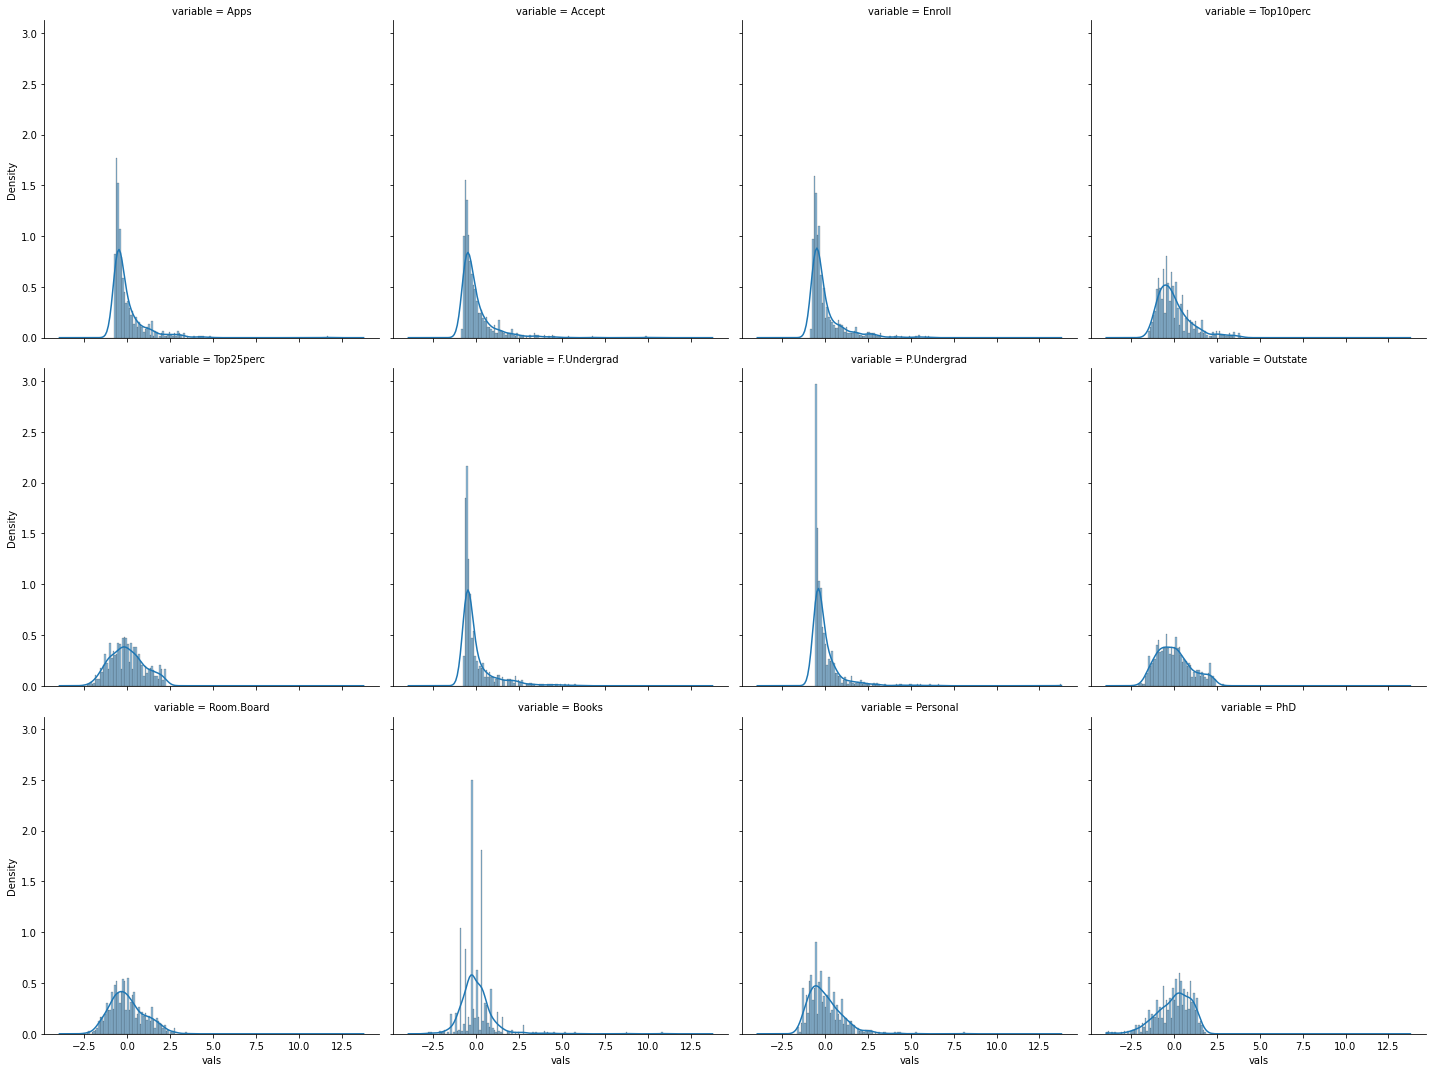

In [70]:
sns.displot(
    data=college_melt, x='vals', 
    col='variable', col_wrap=4,
    kde=True, stat="density", common_norm=False
)

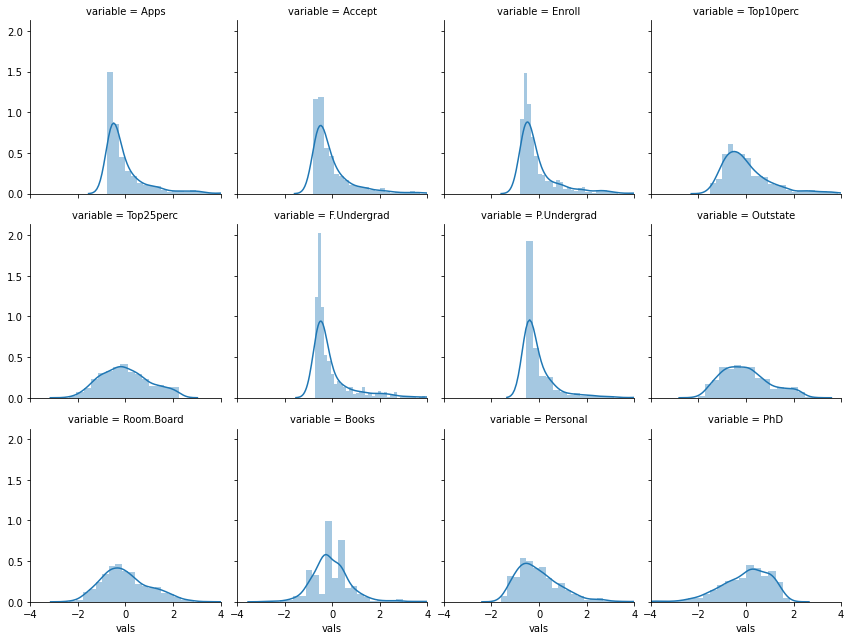

In [56]:
g = sns.FacetGrid(college_melt, col='variable', col_wrap=4)
g.map(sns.distplot, 'vals')
g.set(xlim=(-4, 4))

### 9. Auto dataset

In [46]:
auto = pd.read_csv('../data/Auto.csv')
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [71]:
auto[auto.values == '?']
auto = auto.replace('?', np.NaN)
auto = auto.dropna()

In [72]:
# (a) Which of the predictors are quantitative, and which are qualitative?
datatypes = {'quant': ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration'],
             'qual': ['origin', 'name']}

auto_quant = auto[datatypes['quant']].astype(np.float_)

In [19]:
# (b) What is the range of each quantitative predictor?
# (c) What is the mean and standard deviation of each quantitative predictor?

pd.DataFrame({'range': auto_quant.max() - auto_quant.min(),
              'mean': auto_quant.mean(),
              'std': auto_quant.std()})

,range,mean,std
mpg,37.6,23.445918,7.805007
cylinders,5.0,5.471939,1.705783
displacement,387.0,194.411990,104.644004
horsepower,184.0,104.469388,38.491160
weight,3527.0,2977.584184,849.402560
acceleration,16.8,15.541327,2.758864


In [20]:
# (d) Now remove the 10th through 85th observations. 
# What is the range, mean, and standard deviation of each predictor 
# in the subset of the data that remains?

# drop observations 10 to 85
auto_quant_d = auto_quant.drop(auto_quant.index[10: 85])
# results as dataframe
pd.DataFrame({'range': auto_quant_d.max() - auto_quant_d.min(),
              'mean': auto_quant_d.mean(),
              'std': auto_quant_d.std()})

,range,mean,std
mpg,35.6,24.374763,7.872565
cylinders,5.0,5.381703,1.658135
displacement,387.0,187.880126,100.169973
horsepower,184.0,101.003155,36.003208
weight,3348.0,2938.854890,811.640668
acceleration,16.3,15.704101,2.719913


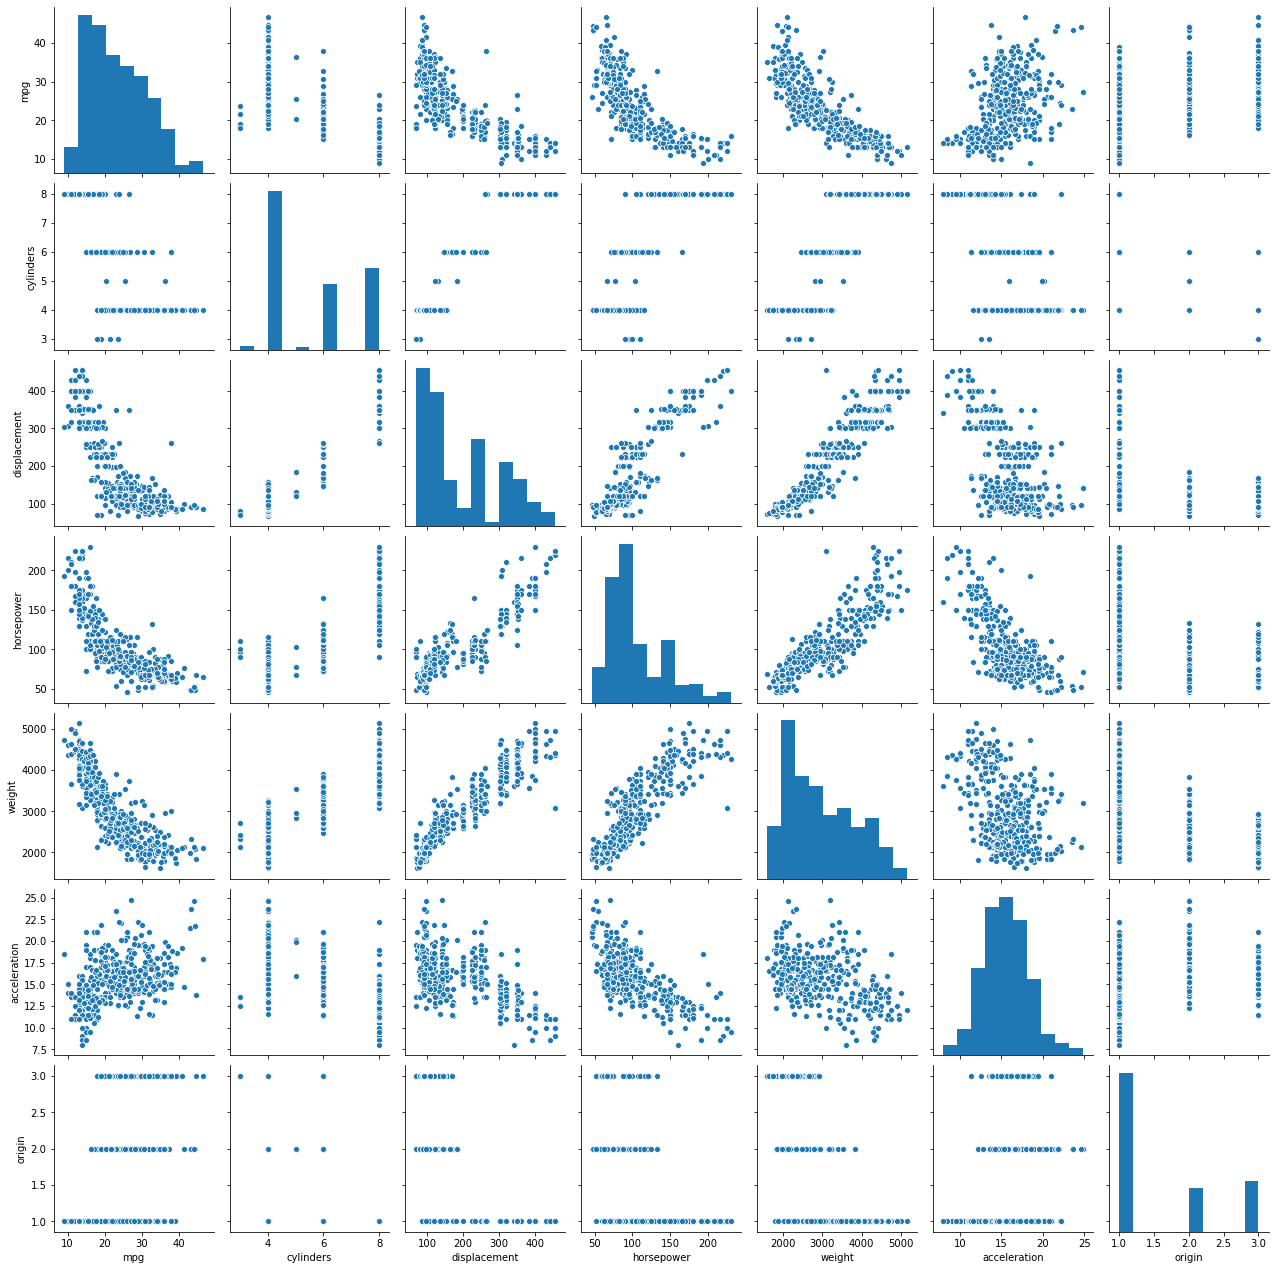

In [21]:
# (e) Using the full data set, investigate the predictors graphically, 
# using scatterplots or other tools of your choice. Create some plots 
# highlighting the relationships among the predictors. Comment on your findings.

# combine numeric quantitive data with original qualitive data
auto_n = pd.concat([auto_quant, auto[datatypes['qual']]], axis=1)
# pairplot grid
_ = sns.pairplot(auto_n)

(f)

Looking at the plots above, displacement, horsepower and weight seem most strongly correlated with mpg. It also seems to be a discernible relationship with cylinders and origin which we might try including in our analysis.

Accelration is not strongly correllated with mpg, so we might consider dropping this feature.

### 10. Boston dataset

(a)

In [22]:
from sklearn.datasets import load_boston

In [23]:
boston_raw = load_boston()
print(boston_raw.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [24]:
print(boston_raw.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [25]:
boston_data = np.column_stack([boston_raw.data, boston_raw.target])
col_names = np.append(boston_raw.feature_names, 'MEDV')

# create the data frame
boston = pd.DataFrame(boston_data, columns = col_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [26]:
boston.shape

(506, 14)

(b)

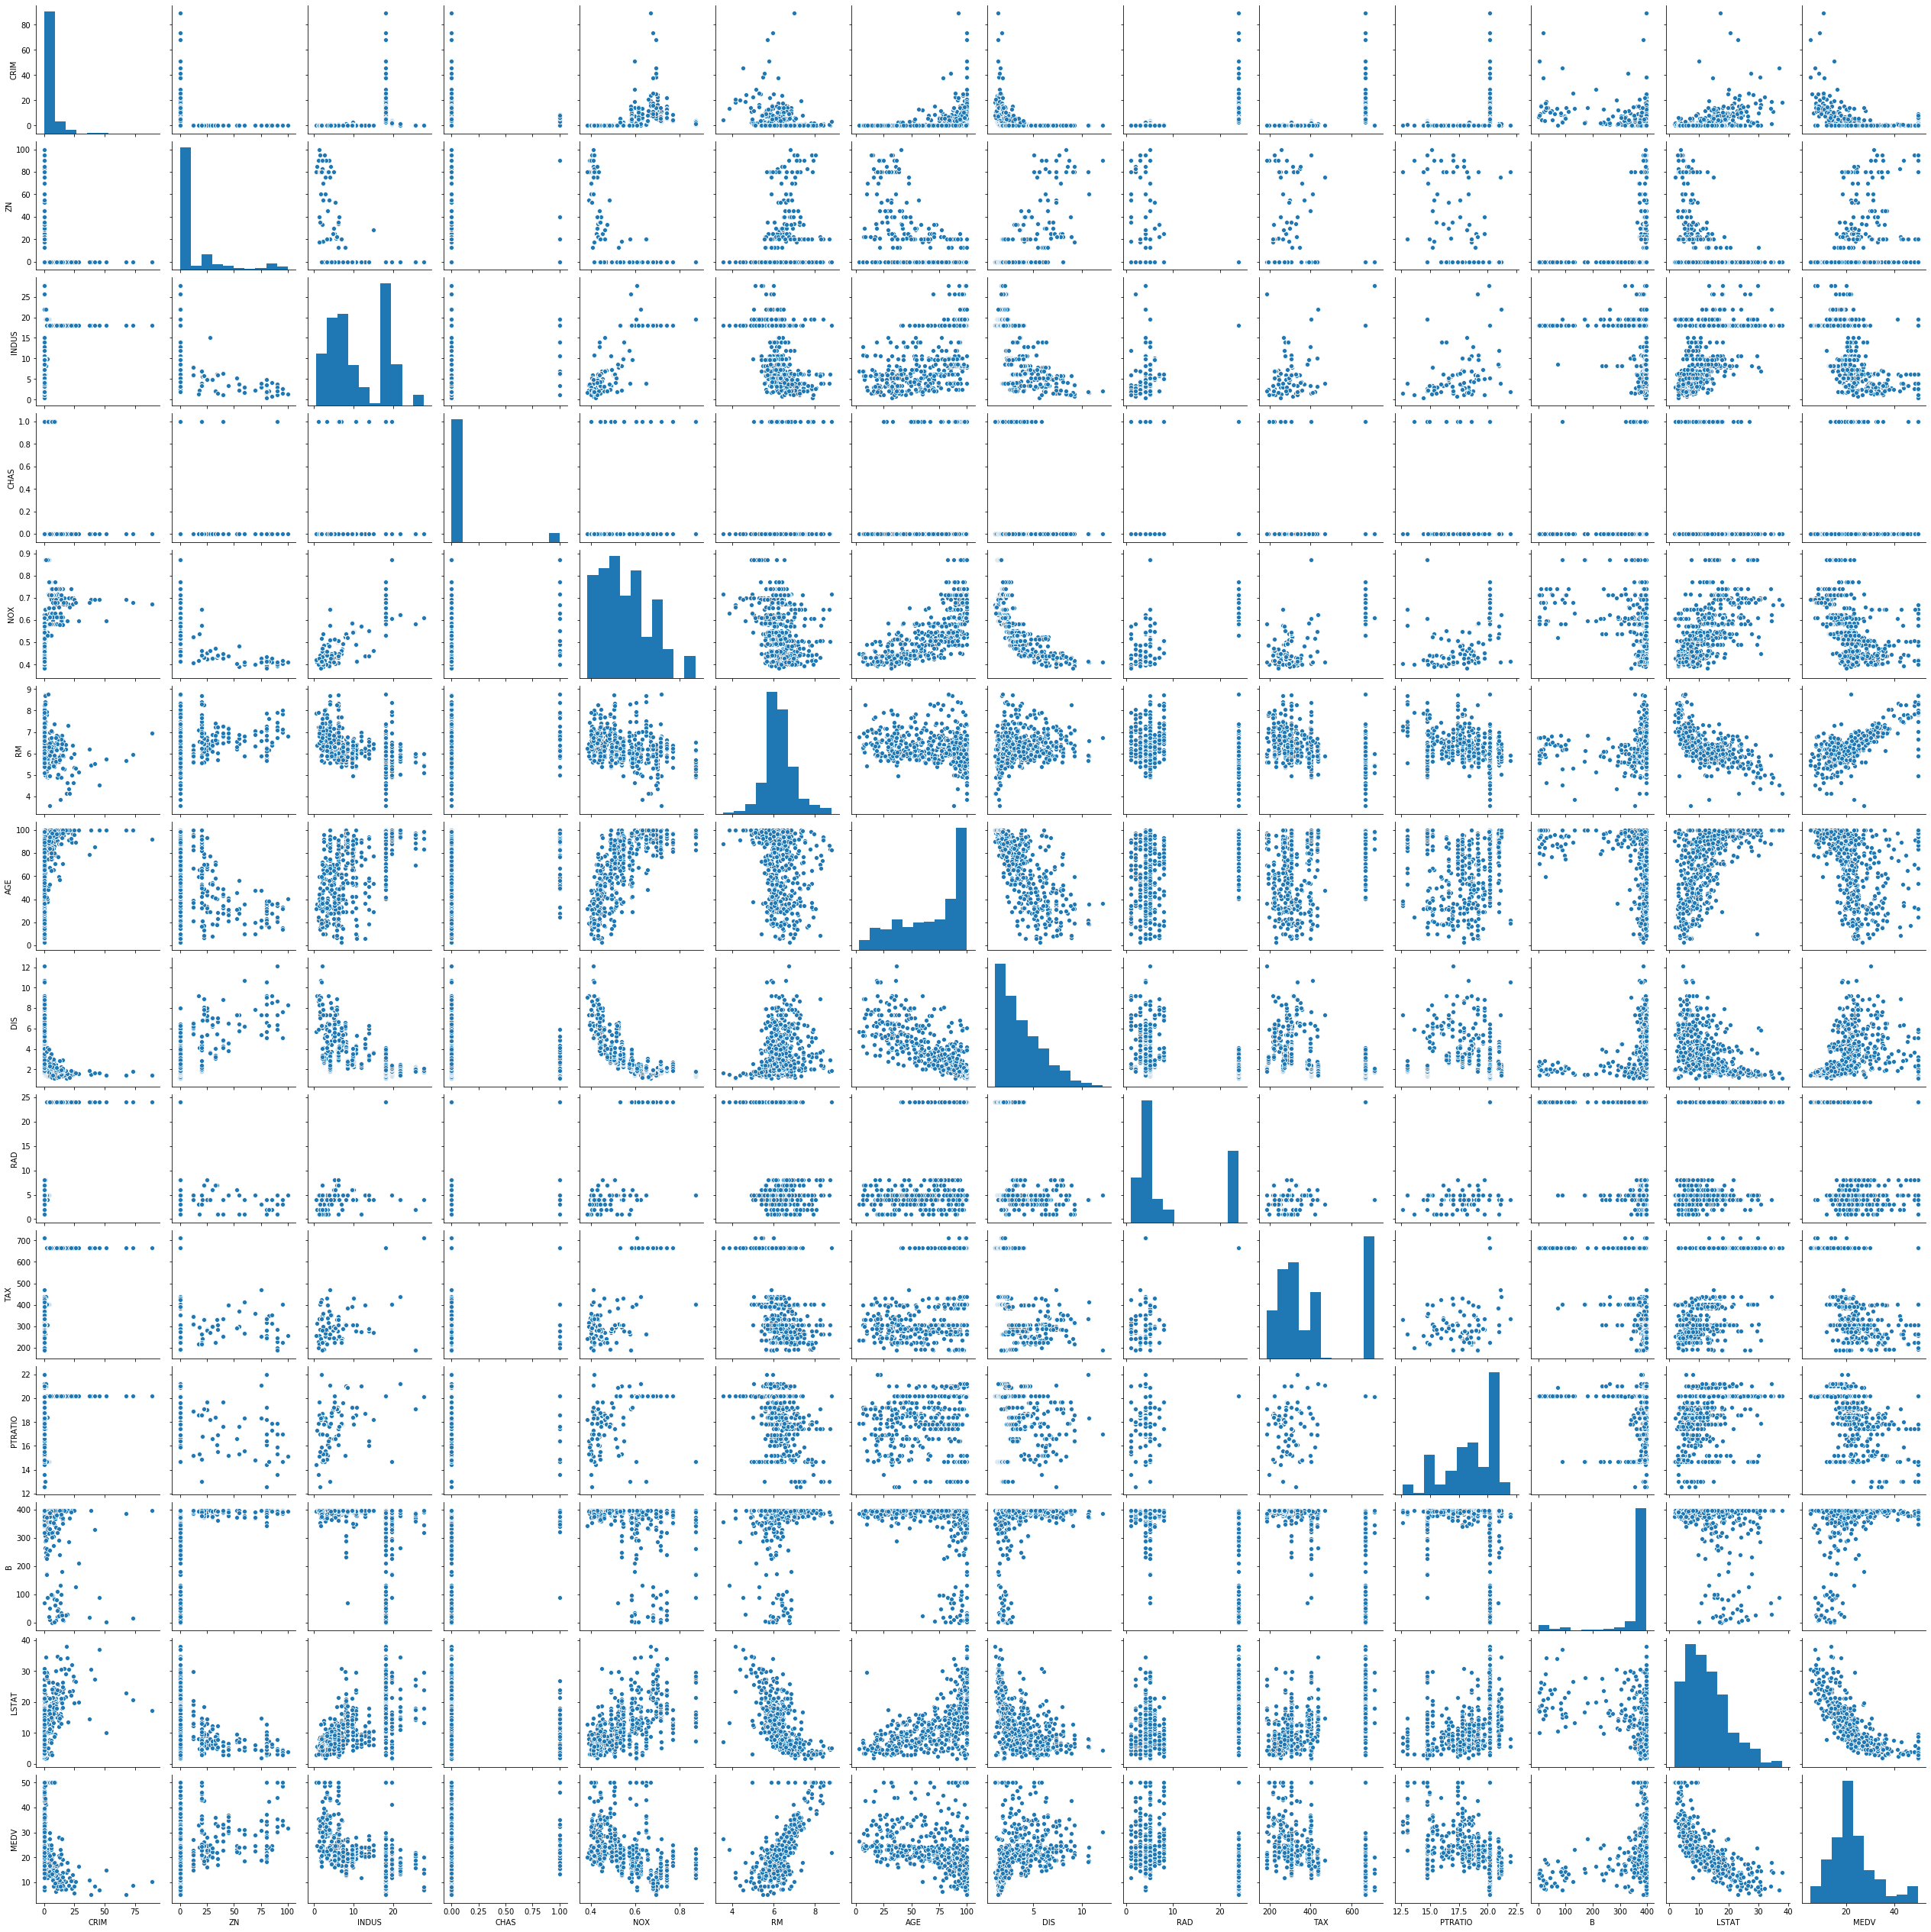

In [27]:
_ = sns.pairplot(boston)

(c)

In [28]:
corr_matrix = boston.corr()
corr_matrix.CRIM.sort_values(ascending=False)

CRIM       1.000000
RAD        0.625505
TAX        0.582764
LSTAT      0.455621
NOX        0.420972
INDUS      0.406583
AGE        0.352734
PTRATIO    0.289946
CHAS      -0.055892
ZN        -0.200469
RM        -0.219247
DIS       -0.379670
B         -0.385064
MEDV      -0.388305
Name: CRIM, dtype: float64

(d)

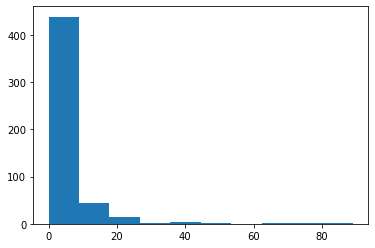

In [29]:
_ = plt.hist(boston.CRIM)
plt.grid(0)

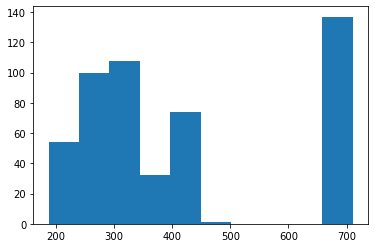

In [30]:
_ = plt.hist(boston.TAX)

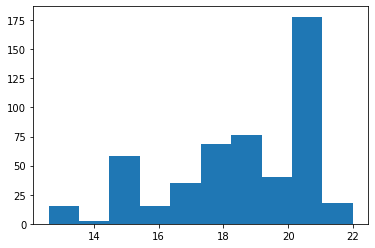

In [31]:
_ = plt.hist(boston.PTRATIO)

In [32]:
sum(boston.CHAS==1)

35

(f)

In [33]:
boston.PTRATIO.median()

19.05

(g)

In [34]:
boston.MEDV.min(), boston.MEDV.idxmin()

(5.0, 398)

In [35]:
print(boston.iloc[398])

CRIM        38.3518
ZN           0.0000
INDUS       18.1000
CHAS         0.0000
NOX          0.6930
RM           5.4530
AGE        100.0000
DIS          1.4896
RAD         24.0000
TAX        666.0000
PTRATIO     20.2000
B          396.9000
LSTAT       30.5900
MEDV         5.0000
Name: 398, dtype: float64


(h)

In [36]:
sum(boston.RM>7)

64

In [37]:
sum(boston.RM>8)

13

In [38]:
UpperClass = boston[boston.RM>8]
UpperClass.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,0.718795,13.615385,7.078462,0.153846,0.539238,8.348538,71.538462,3.430192,7.461538,325.076923,16.361538,385.210769,4.310000,44.200000
std,0.901640,26.298094,5.392767,0.375534,0.092352,0.251261,24.608723,1.883955,5.332532,110.971063,2.410580,10.529359,1.373566,8.092383
min,0.020090,0.000000,2.680000,0.000000,0.416100,8.034000,8.400000,1.801000,2.000000,224.000000,13.000000,354.550000,2.470000,21.900000
25%,0.331470,0.000000,3.970000,0.000000,0.504000,8.247000,70.400000,2.288500,5.000000,264.000000,14.700000,384.540000,3.320000,41.700000
50%,0.520140,0.000000,6.200000,0.000000,0.507000,8.297000,78.300000,2.894400,7.000000,307.000000,17.400000,386.860000,4.140000,48.300000
75%,0.578340,20.000000,6.200000,0.000000,0.605000,8.398000,86.500000,3.651900,8.000000,307.000000,17.400000,389.700000,5.120000,50.000000
max,3.474280,95.000000,19.580000,1.000000,0.718000,8.780000,93.900000,8.906700,24.000000,666.000000,20.200000,396.900000,7.440000,50.000000
